In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import MaxAbsScaler

In [19]:
df = pd.read_csv('data//team_stats.csv')

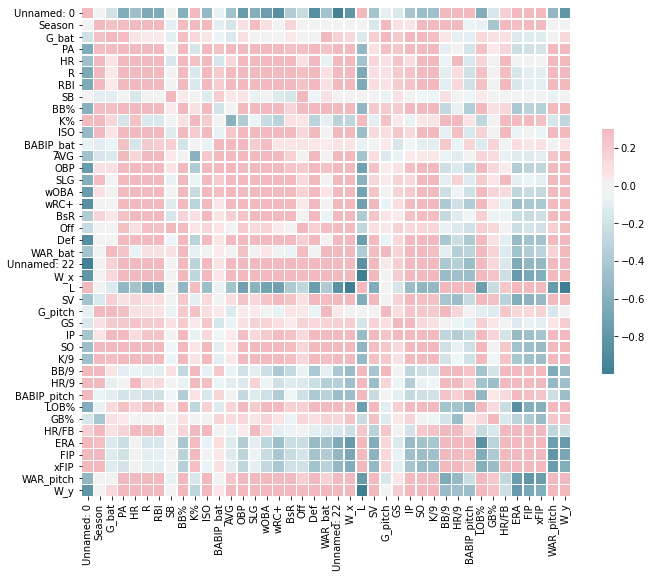

In [20]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
corr.W_y.sort_values()

L             -0.999680
Unnamed: 0    -0.807471
ERA           -0.780728
FIP           -0.678422
xFIP          -0.628866
BB/9          -0.501135
BABIP_pitch   -0.484002
HR/9          -0.467975
K%            -0.290995
HR/FB         -0.225153
G_pitch       -0.029919
SB            -0.012597
Season         0.004550
BABIP_bat      0.068331
G_bat          0.136408
GS             0.198151
GB%            0.247140
Off            0.289049
WAR_bat        0.388630
BsR            0.399268
AVG            0.438976
HR             0.446805
ISO            0.495138
IP             0.502523
K/9            0.526118
PA             0.536053
BB%            0.547174
SO             0.552846
SLG            0.582720
SV             0.633269
RBI            0.648372
R              0.655026
wOBA           0.704555
OBP            0.712403
wRC+           0.719143
LOB%           0.746501
Def            0.746547
WAR_pitch      0.758308
Unnamed: 22    0.833720
W_x            1.000000
W_y            1.000000
Name: W_y, dtype

Notes:
team wins are much more closely correlated with pitcher WAR than with batter WAR (remember that this is fangrapghs war.)
stolen bases mean nothing (I wonder if this was still the case before SB's became much less common)
Def is - defensive runs above average, very highly correlated to team wins! (I did not expect that)
I wonder why batter WAR and wRC+ are so far apart. Might be a normalization thing.

Lets take out the stats that are (sortof!) contained in wOBA (AVG, OBP, SLG)
Lets also clean up some garbage (Unnamed: 0, Unnamed: 22, W_x, L)

In [22]:
df.drop(labels=['AVG','OBP','SLG','Unnamed: 0','Unnamed: 22','W_x','L','Season','Team'], axis=1, inplace=True)

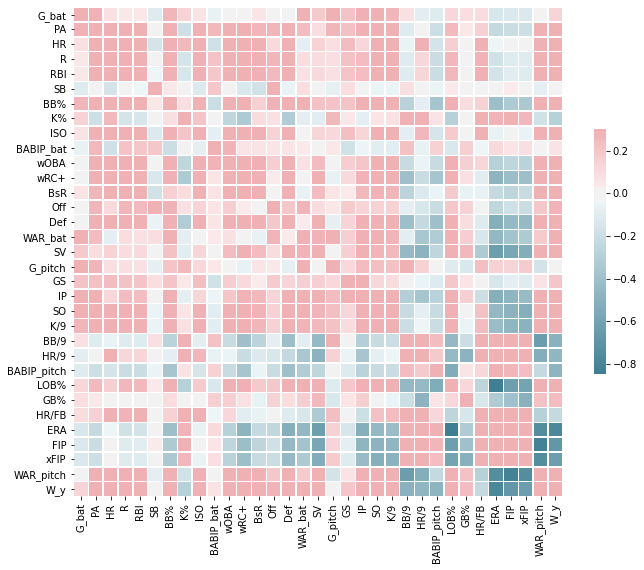

In [23]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

I am very suprised that wRC+ and WAR_hitter are so far apart. 
Let's normalize the values and see if that makes any difference.

In [26]:

# create an abs_scaler object
abs_scaler = MaxAbsScaler()

# calculate the maximum absolute value for scaling the data using the fit method
abs_scaler.fit(df)

# transform the data using the parameters calculated by the fit method (the maximum absolute values)
scaled_data = abs_scaler.transform(df)

# store the results in a data frame
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

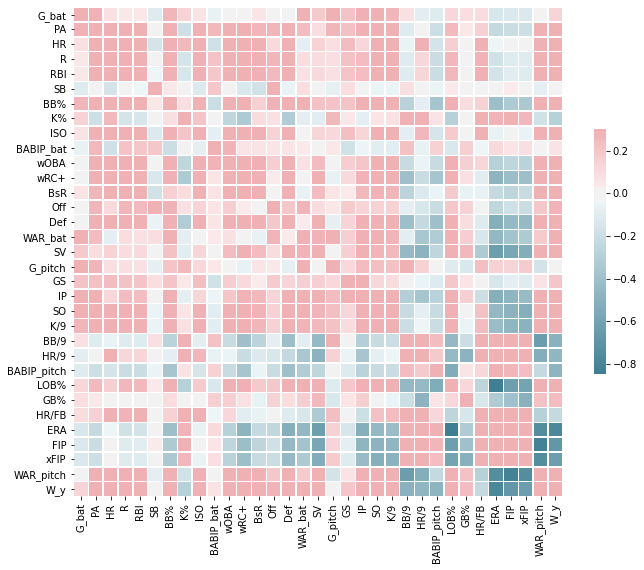

In [27]:
scaled_corr = df_scaled.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
scaled_corr.W_y.sort_values()

ERA           -0.780728
FIP           -0.678422
xFIP          -0.628866
BB/9          -0.501135
BABIP_pitch   -0.484002
HR/9          -0.467975
K%            -0.290995
HR/FB         -0.225153
G_pitch       -0.029919
SB            -0.012597
BABIP_bat      0.068331
G_bat          0.136408
GS             0.198151
GB%            0.247140
Off            0.289049
WAR_bat        0.388630
BsR            0.399268
HR             0.446805
ISO            0.495138
IP             0.502523
K/9            0.526118
PA             0.536053
BB%            0.547174
SO             0.552846
SV             0.633269
RBI            0.648372
R              0.655026
wOBA           0.704555
wRC+           0.719143
LOB%           0.746501
Def            0.746547
WAR_pitch      0.758308
W_y            1.000000
Name: W_y, dtype: float64

It makes no difference.